In [ ]:
# This notebook is aimed at forecating the price of local rice whole sale price

In [1]:
# Starting by importing required libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm

In [2]:
# Then loading the document and reading as a data frame
# the document has already been filtered in excel to get only rows containing data on local rice wholesale
df = pd.read_csv(r'C:\Users\User\Desktop\Local Rice Wholesale.csv', parse_dates=['date'])

In [3]:
# Checking the overview of the loaded data set
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,...,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
0,2015-01-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,135.75,NGN,Nigeria,Kebbi,2227.0,Gwandu,...,9.0,1,1974_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0,1.421280e+09
1,2015-02-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,140.00,NGN,Nigeria,Jigawa,2223.0,Gujungu,...,9.0,1,1973_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0,1.423958e+09
2,2015-03-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,140.00,NGN,Nigeria,Jigawa,2223.0,Gujungu,...,9.0,1,1973_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0,1.426378e+09
3,2015-04-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,145.75,NGN,Nigeria,Kebbi,2227.0,Gwandu,...,9.0,1,1974_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0,1.429056e+09
4,2015-05-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,146.30,NGN,Nigeria,Jigawa,2223.0,Gujungu,...,9.0,1,1973_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0,1.431648e+09


In [4]:
# checking for data types
df.dtypes

date            datetime64[ns]
cmname                  object
unit                    object
category                object
price                  float64
currency                object
country                 object
admname                 object
adm1id                 float64
mktname                 object
mktid                  float64
cmid                     int64
ptid                   float64
umid                   float64
catid                    int64
sn                      object
default                float64
year                   float64
label                   object
cmnameshort             object
scaling                float64
interpolated             int64
x                      float64
dtype: object

In [5]:
# checking for missing data
df.isnull().sum()

date             0
cmname           0
unit             0
category         0
price            0
currency         2
country          2
admname          2
adm1id           2
mktname          2
mktid            2
cmid             0
ptid             2
umid             2
catid            0
sn               2
default         72
year             2
label            0
cmnameshort      0
scaling          0
interpolated     0
x                2
dtype: int64

In [6]:
# getting an overview of the state column
df.admname.value_counts()

Jigawa     13
Borno      11
Gombe       9
Kaduna      8
Kebbi       6
Kano        6
Katsina     5
Yobe        5
Zamfara     4
Oyo         3
Name: admname, dtype: int64

In [7]:
# filling the missing states name with Jigawa, the highest occuring location
df['admname'].fillna('Jigawa', inplace=True)

In [8]:
# confirming if all of the missing values are filled
df['admname'].isnull().value_counts()

False    72
Name: admname, dtype: int64

In [9]:
#renaming the column to suit the task
df = df.rename(columns={'admname': 'State'})

In [10]:
# Since all we need is the date, state and price of the commodity
# we would extract this data into a new data frame
df2 = df[['date', 'State', 'price']]

In [11]:
df2.head()

,date,State,price
0,2015-01-15,Kebbi,135.75
1,2015-02-15,Jigawa,140.00
2,2015-03-15,Jigawa,140.00
3,2015-04-15,Kebbi,145.75
4,2015-05-15,Jigawa,146.30


In [12]:
#renaming the column to suit the task
df2 = df2.rename(columns={'date': 'Date'})
df2 = df2.rename(columns={'price': 'Price/Kg'})


In [13]:
by_state = df2.groupby (['Date','State'])[['Price/Kg']].median().reset_index()

In [14]:
by_state

,Date,State,Price/Kg
0,2015-01-15,Kebbi,135.75
1,2015-02-15,Jigawa,140.00
2,2015-03-15,Jigawa,140.00
3,2015-04-15,Kebbi,145.75
4,2015-05-15,Jigawa,146.30
...,...,...,...
67,2020-08-15,Borno,409.08
68,2020-09-15,Borno,404.35
69,2020-10-15,Jigawa,345.00
70,2020-11-15,Jigawa,336.00


In [15]:
by_state=by_state.set_index('Date')

In [16]:
y = by_state
y

,State,Price/Kg
Date,,
2015-01-15,Kebbi,135.75
2015-02-15,Jigawa,140.00
2015-03-15,Jigawa,140.00
2015-04-15,Kebbi,145.75
2015-05-15,Jigawa,146.30
...,...,...
2020-08-15,Borno,409.08
2020-09-15,Borno,404.35
2020-10-15,Jigawa,345.00


In [17]:
y.drop('State', inplace = True, axis = 1)


In [18]:
y['2015':]

,Price/Kg
Date,
2015-01-15,135.75
2015-02-15,140.00
2015-03-15,140.00
2015-04-15,145.75
2015-05-15,146.30
...,...
2020-08-15,409.08
2020-09-15,404.35
2020-10-15,345.00


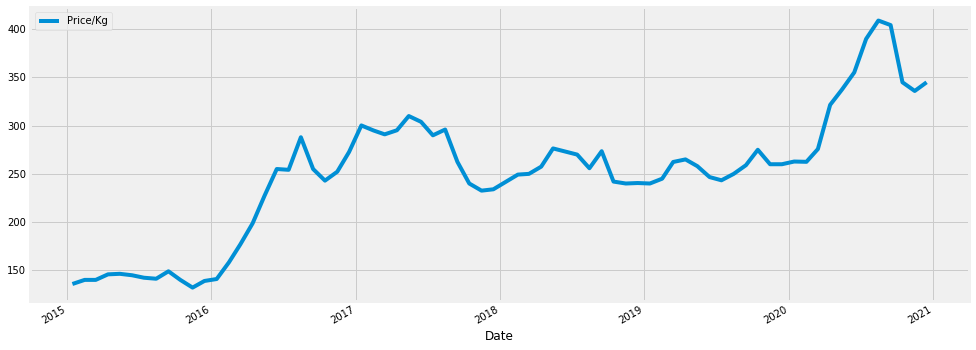

In [19]:
# Plotting our data to visualize the price change over the years
y.plot(figsize=(15,6))


In [20]:
# the plot above shows that there is rarely seasonality pattern, especially 




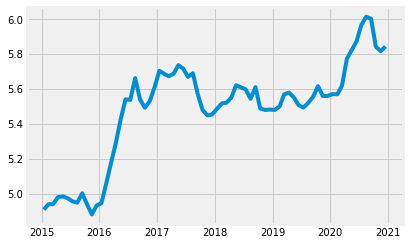

In [23]:
# converting data to log form for simplicity
y_log = np.log(y)
plt.plot(y_log)

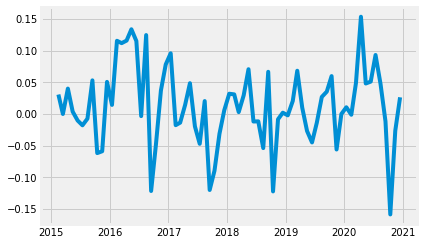

In [26]:
# performing differncing to limit seasonality
y_log_diff = y_log - y_log.shift()
plt.plot(y_log_diff)

In [27]:
y_log_diff.dropna(inplace=True)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

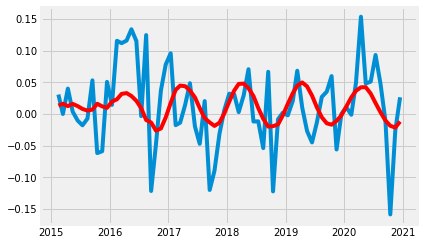

In [33]:
# creating the model
model = ARIMA(y_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(y_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-y_log_diff)**2))

In [36]:
#taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2015-02-15    0.013324
2015-03-15    0.016145
2015-04-15    0.012554
2015-05-15    0.016020
2015-06-15    0.012509
dtype: float64


In [43]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2015-02-15    0.013324
2015-03-15    0.029469
2015-04-15    0.042023
2015-05-15    0.058043
2015-06-15    0.070552
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(y_log['Price/Kg'], index=y_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-01-15    4.910815
2015-02-15    4.954967
2015-03-15    4.971111
2015-04-15    5.023916
2015-05-15    5.043702
dtype: float64

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

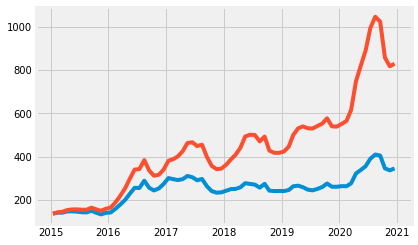

In [48]:
# Taking exponents and making predictions
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y)**2)/len(y)))